# Assignment 2

1) Read chapters 2-4 in your textbook and review the coding examples we went over in class

2) Review the Keras documentation for things like the Layer types and Optimizer types to better familiarize yourself

3) Redo the coding examples and do the "Further experiments" in chapter 3 of your book with datasets you find interesting and may want to use for further assignments and projects

4) Provide a brief write up of the experiment and analysis.

# **table of contents**

1. import libraries
2. data prep
    1. reading data
    2. finding summary data
    3. dummyizing data
    4. creating predictor & outcome attribute lists
    5. transforming data into numpy arrays
    6. creating training and testing data
    7. standardizing the data (z-scoring)
3. modeling
    1. initial model
        1. building layers
        2. fitting model on training data
        3. predicting with test data
    2. further experiments
        1. model using one hiddden layer 
        2. model using more hidden units 
        3. model using mae loss
        4. model using tanh activation
    3. kfold optimization
        1. build model function definition
        2. defining k-fold variables
        3. k-fold loop
        4. plotting k-fold results
        5. building model from validation


---
## 1 import libraries

In [1]:
# data prep
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

# keras imports
from keras import models
from keras import layers
from keras import optimizers

# random seed for pseudo-random operations
random_seed = 100

Using TensorFlow backend.


---
## 2 data prep

#### *2.1 reading dataset*

In [2]:
math_data = pd.read_csv("https://raw.githubusercontent.com/connoralydon/datasets/main/student-math.csv", sep=";")

**data can be found [here](http://archive.ics.uci.edu/ml/datasets/Student+Performance)**

<p>
    <br>Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 
    <br>1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
    <br>2 sex - student's sex (binary: 'F' - female or 'M' - male) 
    <br>3 age - student's age (numeric: from 15 to 22) 
    <br>4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
    <br>5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
    <br>6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
    <br>7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
    <br>8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
    <br>9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
    <br>10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
    <br>11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
    <br>12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
    <br>13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
    <br>14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
    <br>15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
    <br>16 schoolsup - extra educational support (binary: yes or no) 
    <br>17 famsup - family educational support (binary: yes or no) 
    <br>18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
    <br>19 activities - extra-curricular activities (binary: yes or no) 
    <br>20 nursery - attended nursery school (binary: yes or no) 
    <br>21 higher - wants to take higher education (binary: yes or no) 
    <br>22 internet - Internet access at home (binary: yes or no) 
    <br>23 romantic - with a romantic relationship (binary: yes or no) 
    <br>24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
    <br>25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
    <br>26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
    <br>27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
    <br>28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
    <br>29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
    <br>30 absences - number of school absences (numeric: from 0 to 93) 
    <br>
    <br>these grades are related with the course subject, Math or Portuguese: 
    <br>31 G1 - first period grade (numeric: from 0 to 20) 
    <br>31 G2 - second period grade (numeric: from 0 to 20) 
    <br>32 G3 - final grade (numeric: from 0 to 20, output target)
</p>

#### *2.2 summary info about data*

In [3]:
math_data.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freet

In [4]:
math_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
math_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [6]:
math_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
math_data.shape

(395, 33)

In [8]:
# observe the different values used for species - 2 different values: 0, 1
def print_range(data):
    print(f"range of {data.min()} to {data.max()}\n")

print("First test")
print_range(math_data["G2"])

print("Second test")
print_range(math_data["G1"])

print("Final test")
print_range(math_data["G3"])

First test
range of 0 to 19

Second test
range of 3 to 19

Final test
range of 0 to 20



In [9]:
print("total null values")
math_data.isnull().sum(axis=0).sum()

total null values


0

In [10]:
print("num duplicates")
math_data.duplicated().sum(axis=0)

num duplicates


0

#### *2.3 dummyizing data*

In [11]:
categorical_cols = {}

for col in math_data.columns:
    if(math_data[col].dtype == "object"):
        categorical_cols[col] = list(math_data[col].unique())

numerical_cols = list(set(math_data.columns) - set(categorical_cols.keys())) # set difference

math_data_dummy = pd.get_dummies(math_data, columns = categorical_cols.keys())

#### *2.4 model variables*
removing g1, g2, g3 because they would be highly autocorrelary. someone who does good on one test is likely t odo good on another.

In [12]:
predictors = list(math_data_dummy.columns)
predictors.remove("G1") # first exam
predictors.remove("G2") # second exam
predictors.remove("G3") # third exam

outcome = "G3"

#### *2.5 transforming data into numpy arrays*
this is because keras won't take pandas dataframes

In [13]:
X = np.array(math_data_dummy[predictors])
y = np.array(math_data_dummy[outcome])


#### *2.6 creating training and testing data*

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=random_seed)

#### *2.7 standardizing the data (z-scoring)*
to avoid wildy wifferent values in the model

In [15]:
z = StandardScaler() # standard scaling object
# z = MinMaxScaler() # alternative min max scaler so all values should lie between 0-1 for training and about that for testing

# fitting scaler object to training data then outputting it
X_train = z.fit_transform(X_train)
# fit the testing data on the distributions found in the training data
X_test = z.transform(X_test)


---
## 3 modeling

#### *3.1 building initial model*

In [16]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.3, seed=random_seed)) # adding dropout layers to help with overfitting
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1)) # adding this layer because it is a regression problem


2022-03-02 00:32:31.494001: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-02 00:32:31.495570: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


##### *3.1.1 compiling model loss*

In [17]:

model.compile(optimizer='rmsprop', 
              loss='mse', 
              metrics=['mae'])


##### *3.1.2 fitting model on training data*

In [18]:
model_output = model.fit(X_train, y_train, batch_size=20, epochs=20)

Epoch 1/20
316/316 [==============================] - 0s 1ms/step - loss: 118.3580 - mae: 9.9130
Epoch 2/20
316/316 [==============================] - 0s 64us/step - loss: 102.6289 - mae: 9.2095
Epoch 3/20
316/316 [==============================] - 0s 69us/step - loss: 91.5656 - mae: 8.6728
Epoch 4/20
316/316 [==============================] - 0s 68us/step - loss: 76.0432 - mae: 7.9212
Epoch 5/20
316/316 [==============================] - 0s 84us/step - loss: 63.1482 - mae: 7.1596
Epoch 6/20
316/316 [==============================] - 0s 64us/step - loss: 51.6425 - mae: 6.3279
Epoch 7/20
316/316 [==============================] - 0s 64us/step - loss: 39.1787 - mae: 5.4857
Epoch 8/20
316/316 [==============================] - 0s 65us/step - loss: 29.8894 - mae: 4.6153
Epoch 9/20
316/316 [==============================] - 0s 62us/step - loss: 22.9944 - mae: 3.9381
Epoch 10/20
316/316 [==============================] - 0s 64us/step - loss: 24.5114 - mae: 3.9499
Epoch 11/20
316/316 [=======

##### *3.1.3 predicting with test data*

In [19]:
predicted = model.evaluate(X_test, y_test)
print(f"test: mean squared error loss {predicted[0]}")
print(f"test: mean absolute error loss {predicted[1]}")

79/79 [==============================] - 0s 973us/step
test: mean squared error loss 15.218327860288982
test: mean absolute error loss 3.1643083095550537


#### *3.2 further experiments*
The following experiments will help convince you that the architecture choices you’ve made are all fairly reasonable, although there’s still room for improvement:
1. You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.
2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.
3. Try using the mae loss function instead of mse.
4. Try using the tanh activation (an activation that was popular in the early days of
neural networks) instead of relu.

##### *3.2.1 model using one hiddden layer*

In [20]:
model_slim = models.Sequential()
model_slim.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model_slim.add(layers.Dropout(0.3, seed=random_seed)) # adding dropout layers to help with overfitting
model_slim.add(layers.Dense(1)) # adding this layer because it is a regression problem


model_slim.compile(optimizer='rmsprop', 
              loss='mse', 
              metrics=['mae'])

model_slim_output = model_slim.fit(X_train, y_train, batch_size=20, epochs=20)

Epoch 1/20
316/316 [==============================] - 0s 928us/step - loss: 130.8246 - mae: 10.4379
Epoch 2/20
316/316 [==============================] - 0s 70us/step - loss: 120.3331 - mae: 9.9618
Epoch 3/20
316/316 [==============================] - 0s 59us/step - loss: 113.6022 - mae: 9.6726
Epoch 4/20
316/316 [==============================] - 0s 59us/step - loss: 104.0589 - mae: 9.2243
Epoch 5/20
316/316 [==============================] - 0s 59us/step - loss: 96.9397 - mae: 8.8806
Epoch 6/20
316/316 [==============================] - 0s 59us/step - loss: 89.3699 - mae: 8.5300
Epoch 7/20
316/316 [==============================] - 0s 59us/step - loss: 82.7400 - mae: 8.1879
Epoch 8/20
316/316 [==============================] - 0s 58us/step - loss: 73.7910 - mae: 7.6626
Epoch 9/20
316/316 [==============================] - 0s 58us/step - loss: 66.5331 - mae: 7.3049
Epoch 10/20
316/316 [==============================] - 0s 61us/step - loss: 61.9143 - mae: 7.0152
Epoch 11/20
316/316 [==

In [21]:
predicted_slim = model_slim.evaluate(X_test, y_test)
print(f"test: mean squared error loss {predicted_slim[0]}")
print(f"test: mean absolute error loss {predicted_slim[1]}")

79/79 [==============================] - 0s 939us/step
test: mean squared error loss 25.2938937175123
test: mean absolute error loss 4.15211820602417


underfitting here, and not capturing the real values in the data.

##### *3.2.2 model using more hidden units*

In [22]:
model_fat = models.Sequential()
model_fat.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model_fat.add(layers.Dropout(0.3, seed=random_seed)) # adding dropout layers to help with overfitting
model_fat.add(layers.Dense(128, activation='relu'))
model_fat.add(layers.Dropout(0.3, seed=random_seed))
model_fat.add(layers.Dense(1)) # adding this layer because it is a regression problem


model_fat.compile(optimizer='rmsprop', 
              loss='mse', 
              metrics=['mae'])

model_fat_output = model_fat.fit(X_train, y_train, batch_size=20, epochs=20)

Epoch 1/20
316/316 [==============================] - 0s 1ms/step - loss: 56.0610 - mae: 6.3596
Epoch 2/20
316/316 [==============================] - 0s 243us/step - loss: 22.5144 - mae: 3.7731
Epoch 3/20
316/316 [==============================] - 0s 281us/step - loss: 18.8599 - mae: 3.3756
Epoch 4/20
316/316 [==============================] - 0s 319us/step - loss: 17.4967 - mae: 3.2330
Epoch 5/20
316/316 [==============================] - 0s 256us/step - loss: 16.1123 - mae: 3.0867
Epoch 6/20
316/316 [==============================] - 0s 277us/step - loss: 15.4312 - mae: 3.0866
Epoch 7/20
316/316 [==============================] - 0s 252us/step - loss: 14.0872 - mae: 2.9112
Epoch 8/20
316/316 [==============================] - 0s 243us/step - loss: 14.8829 - mae: 3.0200
Epoch 9/20
316/316 [==============================] - 0s 270us/step - loss: 12.0349 - mae: 2.6493
Epoch 10/20
316/316 [==============================] - 0s 287us/step - loss: 12.8396 - mae: 2.7926
Epoch 11/20
316/316 [

In [23]:
predicted_fat = model_fat.evaluate(X_test, y_test)
print(f"test: mean squared error loss {predicted_fat[0]}")
print(f"test: mean absolute error loss {predicted_fat[1]}")

79/79 [==============================] - 0s 1ms/step
test: mean squared error loss 15.87204266801665
test: mean absolute error loss 3.047870635986328


model performs good here, better than the original geometry

##### *3.2.3 model using mae loss*

In [24]:
model_mae = models.Sequential()
model_mae.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model_mae.add(layers.Dropout(0.3, seed=random_seed)) # adding dropout layers to help with overfitting
model_mae.add(layers.Dense(16, activation='relu'))
model_mae.add(layers.Dense(1)) # adding this layer because it is a regression problem


model_mae.compile(optimizer='rmsprop', 
              loss='mae', 
              metrics=['mse'])

model_mae_output = model_mae.fit(X_train, y_train, batch_size=20, epochs=20)

Epoch 1/20
316/316 [==============================] - 0s 1ms/step - loss: 9.6232 - mse: 112.5280
Epoch 2/20
316/316 [==============================] - 0s 81us/step - loss: 8.7322 - mse: 92.5440
Epoch 3/20
316/316 [==============================] - 0s 93us/step - loss: 7.9136 - mse: 77.4263
Epoch 4/20
316/316 [==============================] - 0s 84us/step - loss: 6.8690 - mse: 60.8901
Epoch 5/20
316/316 [==============================] - 0s 102us/step - loss: 5.8822 - mse: 46.2384
Epoch 6/20
316/316 [==============================] - 0s 107us/step - loss: 5.2873 - mse: 38.4869
Epoch 7/20
316/316 [==============================] - 0s 62us/step - loss: 4.3899 - mse: 28.6425
Epoch 8/20
316/316 [==============================] - 0s 66us/step - loss: 4.1893 - mse: 25.4656
Epoch 9/20
316/316 [==============================] - 0s 61us/step - loss: 4.0343 - mse: 24.7666
Epoch 10/20
316/316 [==============================] - 0s 65us/step - loss: 3.9112 - mse: 24.5084
Epoch 11/20
316/316 [======

In [25]:
predicted_mae_model = model_mae.evaluate(X_test, y_test)
print(f"test: mean squared error loss {predicted_mae_model[1]}")
print(f"test: mean absolute error loss {predicted_mae_model[0]}")

79/79 [==============================] - 0s 944us/step
test: mean squared error loss 15.803775787353516
test: mean absolute error loss 3.0256048214586477


the model performs about the same in this case with a little bit better scores overall

##### *3.2.4 model using tanh activation*

In [26]:
model_tanh = models.Sequential()
model_tanh.add(layers.Dense(32, activation='tanh', input_shape=(X_train.shape[1],)))
model_tanh.add(layers.Dropout(0.3, seed=random_seed)) # adding dropout layers to help with overfitting
model_tanh.add(layers.Dense(16, activation='tanh'))
model_tanh.add(layers.Dense(1)) # adding this layer because it is a regression problem


model_tanh.compile(optimizer='rmsprop', 
              loss='mse', 
              metrics=['mae'])

model_tanh_output = model_tanh.fit(X_train, y_train, batch_size=20, epochs=20)

Epoch 1/20
316/316 [==============================] - 0s 1ms/step - loss: 126.5751 - mae: 10.2939
Epoch 2/20
316/316 [==============================] - 0s 63us/step - loss: 122.1501 - mae: 10.0991
Epoch 3/20
316/316 [==============================] - 0s 64us/step - loss: 117.3921 - mae: 9.9126
Epoch 4/20
316/316 [==============================] - 0s 70us/step - loss: 114.7226 - mae: 9.8298
Epoch 5/20
316/316 [==============================] - 0s 65us/step - loss: 111.6152 - mae: 9.6545
Epoch 6/20
316/316 [==============================] - 0s 63us/step - loss: 106.4805 - mae: 9.4421
Epoch 7/20
316/316 [==============================] - 0s 59us/step - loss: 104.1886 - mae: 9.3610
Epoch 8/20
316/316 [==============================] - 0s 62us/step - loss: 96.4676 - mae: 9.0145
Epoch 9/20
316/316 [==============================] - 0s 58us/step - loss: 91.6401 - mae: 8.7799
Epoch 10/20
316/316 [==============================] - 0s 77us/step - loss: 85.0526 - mae: 8.3990
Epoch 11/20
316/316 [

In [27]:
predicted_tanh = model_tanh.evaluate(X_test, y_test)
print(f"test: mean squared error loss {predicted_tanh[0]}")
print(f"test: mean absolute error loss {predicted_tanh[1]}")

79/79 [==============================] - 0s 926us/step
test: mean squared error loss 43.97593906257726
test: mean absolute error loss 5.622044086456299


lots more loss in a model that uses a tanh actuvation vs relu activation for this neural network geometry

#### *3.3 k fold validation*

the code here is taken out of the textbook for the regression examples

##### *3.3.1 build model function definition*

In [28]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu',
                           input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

##### *3.3.2 defining k-fold variables*

In [29]:
n_folds = 10
num_epochs = 20
num_val_samples = len(X_train) // n_folds
all_mae_histories = []

##### *3.3.3 k-fold loop*

In [30]:

for i in range(n_folds):
    print("processing fold #", i)
    val_data = X_train[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples : (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis = 0)
    
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis = 0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


##### *3.3.4 plotting k-fold results*

In [31]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

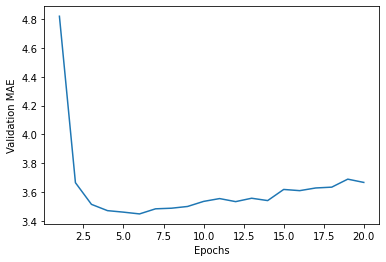

In [32]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

looks like validation mean absolute error is minimized at around 10 epochs or so

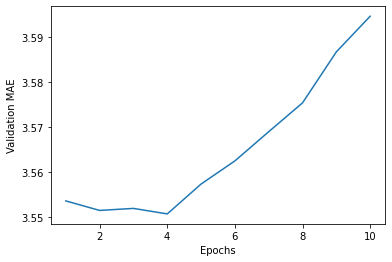

In [33]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

this shows the average validation score vs number of epochs. it goes up over the epochs, but is not that different in absolute terms.

##### *3.3.5 building model from validation*

In [34]:
model = build_model()
model.fit(X_train, y_train,
          epochs = 10, batch_size = 20)

test_mse_score, test_mae_score = model.evaluate(X_test, y_test)
print(f"testing mean absolute error {test_mae_score}")

Epoch 1/10
316/316 [==============================] - 0s 899us/step - loss: 125.9590 - mae: 10.2354
Epoch 2/10
316/316 [==============================] - 0s 62us/step - loss: 108.1365 - mae: 9.4563
Epoch 3/10
316/316 [==============================] - 0s 77us/step - loss: 93.4494 - mae: 8.7767
Epoch 4/10
316/316 [==============================] - 0s 54us/step - loss: 78.9494 - mae: 8.0436
Epoch 5/10
316/316 [==============================] - 0s 67us/step - loss: 64.9423 - mae: 7.2385
Epoch 6/10
316/316 [==============================] - 0s 60us/step - loss: 51.8186 - mae: 6.3765
Epoch 7/10
316/316 [==============================] - 0s 58us/step - loss: 40.3951 - mae: 5.5143
Epoch 8/10
316/316 [==============================] - 0s 61us/step - loss: 31.0415 - mae: 4.6974
Epoch 9/10
316/316 [==============================] - 0s 55us/step - loss: 24.1974 - mae: 4.0408
Epoch 10/10
79/79 [==============================] - 0s 723us/step
testing mean absolute error 3.7550230026245117


the mean absolute error for the testing error is 3.3 grade units out of 20. this model does pretty well and is not far off from the training data. 3.26 mae in training and 3.3 in testing. epochs of 10 are a good way to normalize it for this network geometry.